In [66]:
%matplotlib inline
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import spearmanr
import numpy as np

In [6]:
data_dir = "/Users/amlalejini/DataPlayground/GPTP2018-MAPE-PROJ"
signalgp_data_fpath = os.path.join(data_dir, "signalgp_pop_data.csv")
scopegp_data_fpath = os.path.join(data_dir, "scopegp_trait_data_filtered.csv")

In [7]:
# Load data
signalgp_data = pd.read_csv(signalgp_data_fpath)
scopegp_data = pd.read_csv(scopegp_data_fpath)

In [143]:
# Filter data by problem
scopegp_LOGIC_ALL = scopegp_data[scopegp_data["problem"] == "LOGIC"]
scopegp_SQUARES_ALL = scopegp_data[scopegp_data["problem"] == "SQUARES"]
scopegp_SMALLEST_ALL = scopegp_data[scopegp_data["problem"] == "SMALLEST"]
scopegp_SUM_ALL = scopegp_data[scopegp_data["problem"] == "SUM"]
scopegp_COLLATZ_ALL = scopegp_data[scopegp_data["problem"] == "COLLATZ"]
scopegp_SYMREG_ALL = scopegp_data[scopegp_data["problem"] == "SYMREG"]

In [147]:
UPDATE = 50000
scopegp_LOGIC = scopegp_LOGIC_ALL[scopegp_LOGIC_ALL["update"] == UPDATE]
scopegp_SQUARES = scopegp_SQUARES_ALL[scopegp_SQUARES_ALL["update"] == UPDATE]
scopegp_SMALLEST = scopegp_SMALLEST_ALL[scopegp_SMALLEST_ALL["update"] == UPDATE]
scopegp_SUM = scopegp_SUM_ALL[scopegp_SUM_ALL["update"] == UPDATE]
scopegp_COLLATZ = scopegp_COLLATZ_ALL[scopegp_COLLATZ_ALL["update"] == UPDATE]
scopegp_SYMREG = scopegp_SYMREG_ALL[scopegp_SYMREG_ALL["update"] == UPDATE]

In [145]:
scope_min_inst_ent = 0
scope_max_inst_ent = 5

min_scope_cnt = 0
max_scope_cnt = 17

In [146]:
xy_label_fs = 18
xy_tick_fs = 14
cmap = sns.cubehelix_palette(as_cmap=True)

## Logic Problem

In [152]:
# LOGIC problem
min_fitness = 10 # You must have at least 10 fitness to not be filtered.
# - RANDOM (all), TOURNAMENT (FILTERED), MAPE (FILTERED), LEX (FILTERED)
scopegp_LOGIC_RAND = scopegp_LOGIC[scopegp_LOGIC["selection_method"] == "RAND"]
scopegp_LOGIC_TOURN = scopegp_LOGIC[scopegp_LOGIC["selection_method"] == "TOURN"]
scopegp_LOGIC_MAPE = scopegp_LOGIC[scopegp_LOGIC["selection_method"] == "MAPE"]
scopegp_LOGIC_LEX = scopegp_LOGIC[scopegp_LOGIC["selection_method"] == "LEX"]

# Filter to only successful organisms
scopegp_LOGIC_TOURN = scopegp_LOGIC_TOURN[scopegp_LOGIC_TOURN["fitness"]>= min_fitness]
scopegp_LOGIC_MAPE = scopegp_LOGIC_MAPE[scopegp_LOGIC_MAPE["fitness"]  >= min_fitness]
scopegp_LOGIC_LEX = scopegp_LOGIC_LEX[scopegp_LOGIC_LEX["fitness"] >= min_fitness]


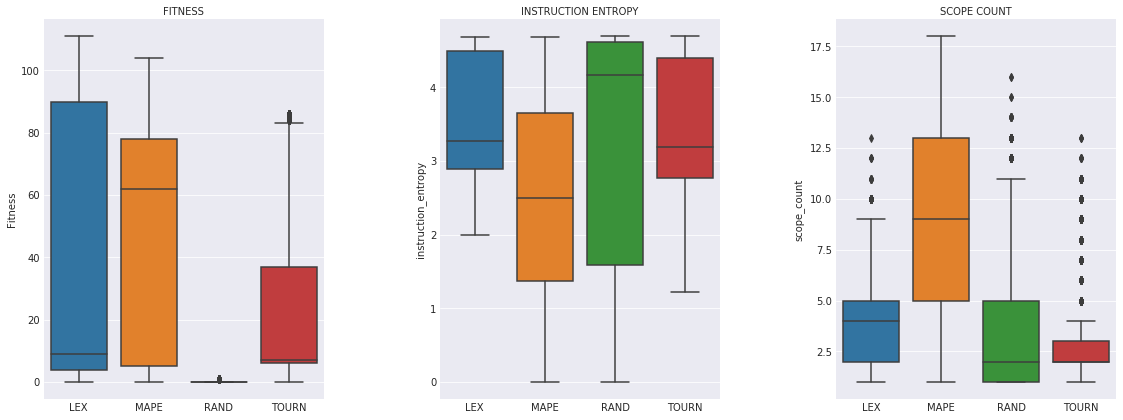

In [153]:
fig = plt.figure(1)
gridspec.GridSpec(1,16)
fig.set_size_inches(21, 7)

with sns.axes_style("darkgrid"):
    ax1 = plt.subplot2grid((1,12), (0,0), colspan=3)
    sns.boxplot(x="selection_method", y="fitness", data=scopegp_LOGIC, ax=ax1)
#     sns.swarmplot(x="selection_method", y="fitness", data=scopegp_LOGIC, ax=ax1, color=".1")

    ax1.set_xlabel("FITNESS")
    ax1.set_ylabel("Fitness")
#     ax1.set_ylim(min_fitness, max_fitness + 10)

#     for tick in ax1.get_yticklabels():
#         tick.set_fontsize(y_tick_fs)

#     for tick in ax1.get_xticklabels():
#         tick.set_fontsize(x_tick_fs)

#     ax1.yaxis.label.set_fontsize(y_label_fs)
#     ax1.xaxis.label.set_fontsize(x_label_fs)
    ax1.xaxis.set_label_position('top')


    ax2 = plt.subplot2grid((1,12), (0,4), colspan=3)
    p2 = sns.boxplot(x="selection_method", y="instruction_entropy", data=scopegp_LOGIC, ax=ax2)
#     sns.swarmplot(x="sim_thresh", y="fitness", data=evo_df_DS0[evo_df_DS0["update"] == 10000], ax=ax2, color=".1")
#     ax2.set_xticklabels(labels)
    ax2.set_xlabel("INSTRUCTION ENTROPY")

#     ax2.set_ylabel("")
#     plt.setp(ax2.get_yticklabels(), visible = False)

#     ax2.set_ylim(min_fitness, max_fitness + 10)

#     for tick in ax2.get_yticklabels():
#         tick.set_fontsize(y_tick_fs)

#     for tick in ax2.get_xticklabels():
#         tick.set_fontsize(x_tick_fs)

#     ax2.yaxis.label.set_fontsize(y_label_fs)
#     ax2.xaxis.label.set_fontsize(x_label_fs)
    ax2.xaxis.set_label_position('top')
    
    
    ax3 = plt.subplot2grid((1,12), (0,8), colspan=3)
    p3 = sns.boxplot(x="selection_method", y="scope_count", data=scopegp_LOGIC, ax=ax3)
#     sns.swarmplot(x="sim_thresh", y="fitness", data=evo_df_DS0[evo_df_DS0["update"] == 10000], ax=ax2, color=".1")
#     ax2.set_xticklabels(labels)
    ax3.set_xlabel("SCOPE COUNT")
    ax3.xaxis.set_label_position('top')

    

### Logic Problem - Tournament

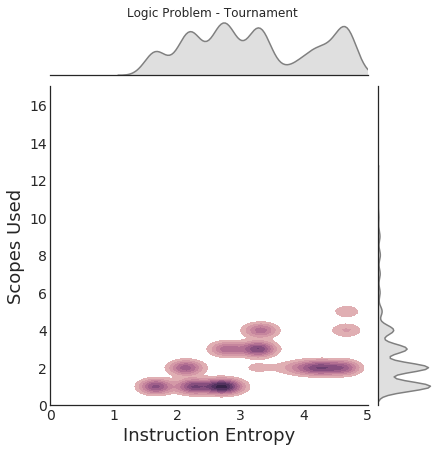

In [154]:
fig = plt.figure(1)
fig.set_size_inches(7,7)

with sns.axes_style("white"):

    g = sns.jointplot(data=scopegp_LOGIC_TOURN, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, color="Grey", shade_lowest=False)
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('Logic Problem - Tournament ', y=1.2, x=-3)

### Logic Problem - Map-Elites 

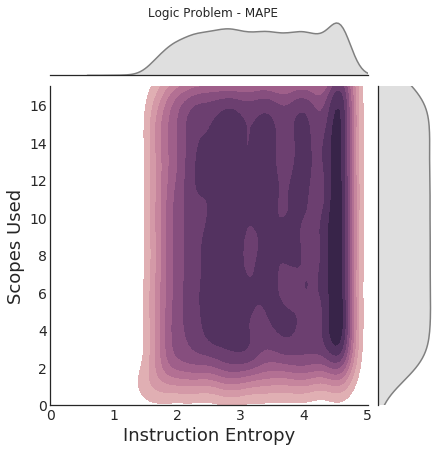

In [155]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_LOGIC_MAPE, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('Logic Problem - MAPE ', y=1.2, x=-3)

### Logic Problem - Lexicase 

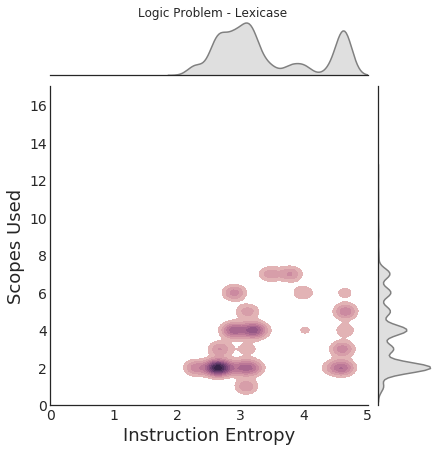

In [156]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_LOGIC_LEX, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('Logic Problem - Lexicase ', y=1.2, x=-3)

### Logic Problem - Random drift 

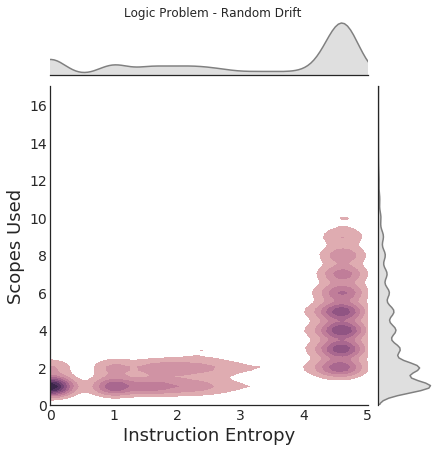

In [157]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_LOGIC_RAND, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('Logic Problem - Random Drift ', y=1.2, x=-3)

---

## Squares Problem

In [158]:
# LOGIC problem
min_fitness = 10000 # You must have at least 10 fitness to not be filtered.
# - RANDOM (all), TOURNAMENT (FILTERED), MAPE (FILTERED), LEX (FILTERED)
scopegp_SQUARES_RAND = scopegp_SQUARES[scopegp_SQUARES["selection_method"] == "RAND"]
scopegp_SQUARES_TOURN = scopegp_SQUARES[scopegp_SQUARES["selection_method"] == "TOURN"]
scopegp_SQUARES_MAPE = scopegp_SQUARES[scopegp_SQUARES["selection_method"] == "MAPE"]
scopegp_SQUARES_LEX = scopegp_SQUARES[scopegp_SQUARES["selection_method"] == "LEX"]

# Filter to only successful organisms
scopegp_SQUARES_TOURN = scopegp_SQUARES_TOURN[scopegp_SQUARES_TOURN["fitness"]>= min_fitness]
scopegp_SQUARES_MAPE = scopegp_SQUARES_MAPE[scopegp_SQUARES_MAPE["fitness"]  >= min_fitness]
scopegp_SQUARES_LEX = scopegp_SQUARES_LEX[scopegp_SQUARES_LEX["fitness"] >= min_fitness]


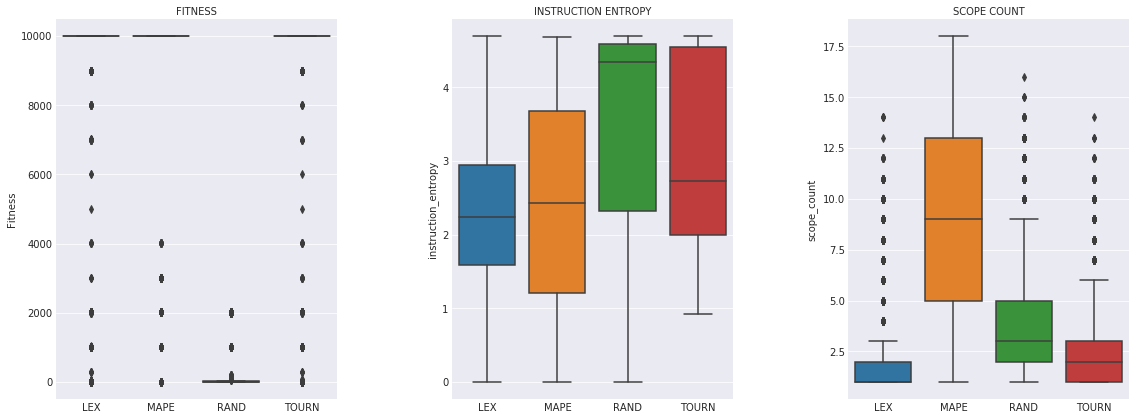

In [159]:
fig = plt.figure(1)
gridspec.GridSpec(1,16)
fig.set_size_inches(21, 7)

with sns.axes_style("darkgrid"):
    ax1 = plt.subplot2grid((1,12), (0,0), colspan=3)
    sns.boxplot(x="selection_method", y="fitness", data=scopegp_SQUARES, ax=ax1)
    ax1.set_xlabel("FITNESS")
    ax1.set_ylabel("Fitness")
    ax1.xaxis.set_label_position('top')

    ax2 = plt.subplot2grid((1,12), (0,4), colspan=3)
    p2 = sns.boxplot(x="selection_method", y="instruction_entropy", data=scopegp_SQUARES, ax=ax2)
    ax2.set_xlabel("INSTRUCTION ENTROPY")
    ax2.xaxis.set_label_position('top')
    
    
    ax3 = plt.subplot2grid((1,12), (0,8), colspan=3)
    p3 = sns.boxplot(x="selection_method", y="scope_count", data=scopegp_SQUARES, ax=ax3)
    ax3.set_xlabel("SCOPE COUNT")
    ax3.xaxis.set_label_position('top')

### Squares Problem - Tournament 

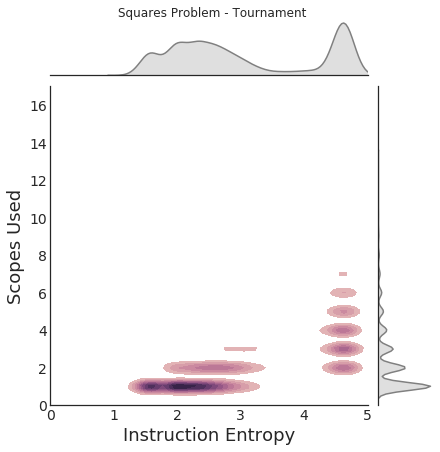

In [160]:
fig = plt.figure(1)
fig.set_size_inches(7,7)

with sns.axes_style("white"):

    g = sns.jointplot(data=scopegp_SQUARES_TOURN, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, color="Grey", shade_lowest=False)
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('Squares Problem - Tournament ', y=1.2, x=-3)

### Squares Problem - Map-Elites 

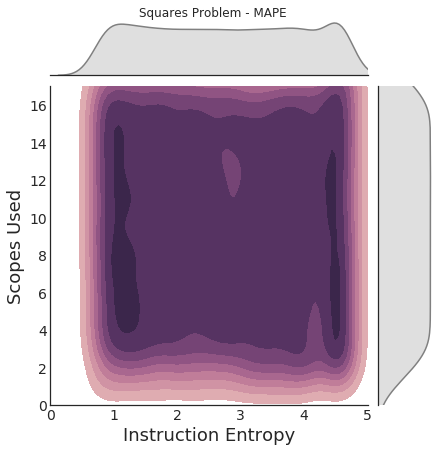

In [161]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_SQUARES_MAPE, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('Squares Problem - MAPE ', y=1.2, x=-3)

### Squares Problem - Lexicase 

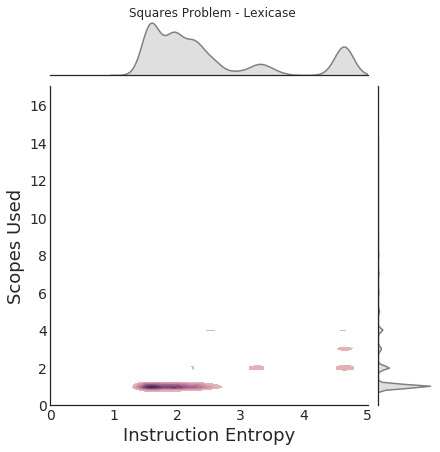

In [162]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_SQUARES_LEX, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('Squares Problem - Lexicase ', y=1.2, x=-3)

### Squares Problem - Random drift 

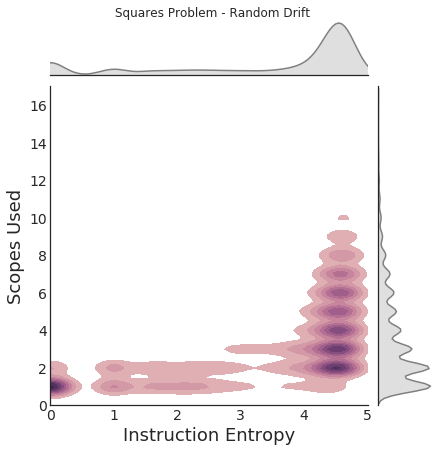

In [163]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_SQUARES_RAND, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('Squares Problem - Random Drift ', y=1.2, x=-3)

--- 

## Smallest Problem

In [164]:
# SMALLEST problem
min_fitness = 200000 # You must have at least 10 fitness to not be filtered.
# - RANDOM (all), TOURNAMENT (FILTERED), MAPE (FILTERED), LEX (FILTERED)
scopegp_SMALLEST_RAND = scopegp_SMALLEST[scopegp_SMALLEST["selection_method"] == "RAND"]
scopegp_SMALLEST_TOURN = scopegp_SMALLEST[scopegp_SMALLEST["selection_method"] == "TOURN"]
scopegp_SMALLEST_MAPE = scopegp_SMALLEST[scopegp_SMALLEST["selection_method"] == "MAPE"]
scopegp_SMALLEST_LEX = scopegp_SMALLEST[scopegp_SMALLEST["selection_method"] == "LEX"]

# Filter to only successful organisms
scopegp_SMALLEST_TOURN = scopegp_SMALLEST_TOURN[scopegp_SMALLEST_TOURN["fitness"]>= min_fitness]
scopegp_SMALLEST_MAPE = scopegp_SMALLEST_MAPE[scopegp_SMALLEST_MAPE["fitness"]  >= min_fitness]
scopegp_SMALLEST_LEX = scopegp_SMALLEST_LEX[scopegp_SMALLEST_LEX["fitness"] >= min_fitness]


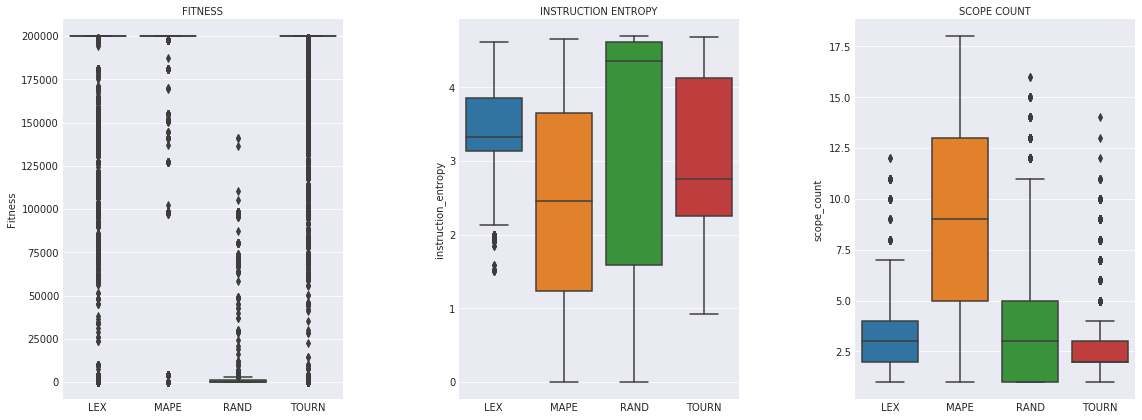

In [165]:
fig = plt.figure(1)
gridspec.GridSpec(1,16)
fig.set_size_inches(21, 7)

with sns.axes_style("darkgrid"):
    ax1 = plt.subplot2grid((1,12), (0,0), colspan=3)
    sns.boxplot(x="selection_method", y="fitness", data=scopegp_SMALLEST, ax=ax1)
    ax1.set_xlabel("FITNESS")
    ax1.set_ylabel("Fitness")
    ax1.xaxis.set_label_position('top')

    ax2 = plt.subplot2grid((1,12), (0,4), colspan=3)
    p2 = sns.boxplot(x="selection_method", y="instruction_entropy", data=scopegp_SMALLEST, ax=ax2)
    ax2.set_xlabel("INSTRUCTION ENTROPY")
    ax2.xaxis.set_label_position('top')
    
    
    ax3 = plt.subplot2grid((1,12), (0,8), colspan=3)
    p3 = sns.boxplot(x="selection_method", y="scope_count", data=scopegp_SMALLEST, ax=ax3)
    ax3.set_xlabel("SCOPE COUNT")
    ax3.xaxis.set_label_position('top')

### Smallest Problem - Tournament 

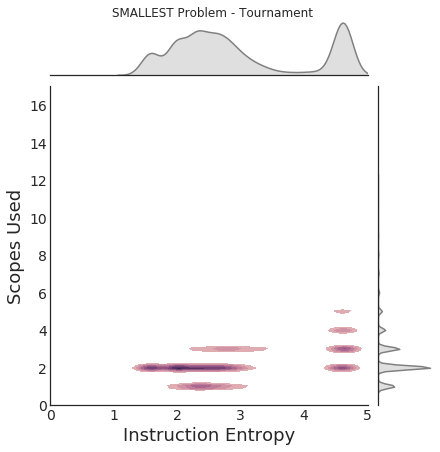

In [166]:
fig = plt.figure(1)
fig.set_size_inches(7,7)

with sns.axes_style("white"):

    g = sns.jointplot(data=scopegp_SMALLEST_TOURN, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, color="Grey", shade_lowest=False)
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('SMALLEST Problem - Tournament ', y=1.2, x=-3)

### SMALLEST Problem - Map-Elites 

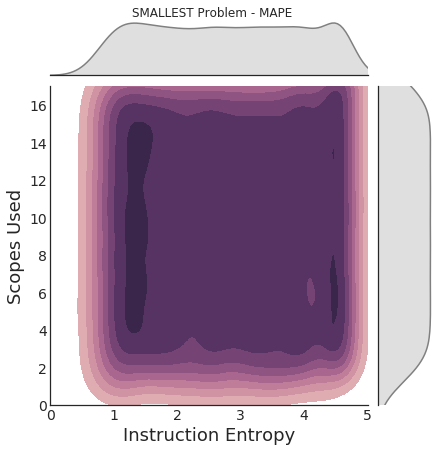

In [167]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_SMALLEST_MAPE, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('SMALLEST Problem - MAPE ', y=1.2, x=-3)

### SMALLEST Problem - Lexicase 

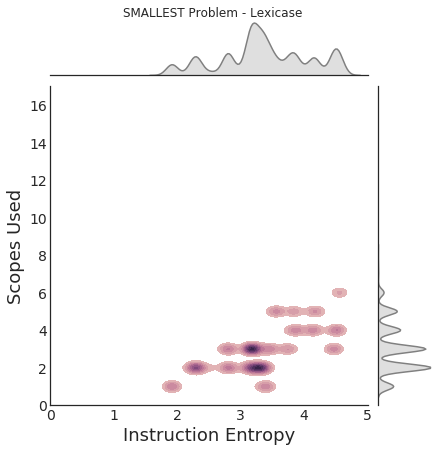

In [168]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_SMALLEST_LEX, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('SMALLEST Problem - Lexicase ', y=1.2, x=-3)

### SMALLEST Problem - Random drift 

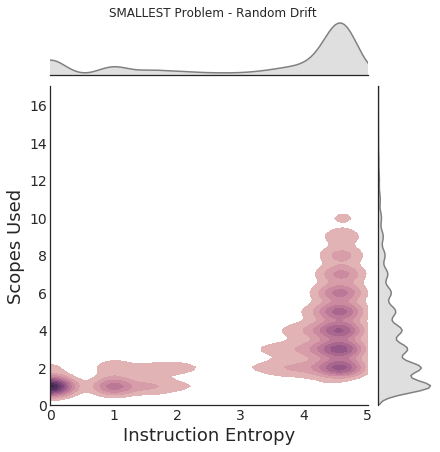

In [169]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_SMALLEST_RAND, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('SMALLEST Problem - Random Drift ', y=1.2, x=-3)

--- 

## SUM PROBLEM

In [170]:
# SUM problem
min_fitness = 200000 # You must have at least 10 fitness to not be filtered.
# - RANDOM (all), TOURNAMENT (FILTERED), MAPE (FILTERED), LEX (FILTERED)
scopegp_SUM_RAND = scopegp_SUM[scopegp_SUM["selection_method"] == "RAND"]
scopegp_SUM_TOURN = scopegp_SUM[scopegp_SUM["selection_method"] == "TOURN"]
scopegp_SUM_MAPE = scopegp_SUM[scopegp_SUM["selection_method"] == "MAPE"]
scopegp_SUM_LEX = scopegp_SUM[scopegp_SUM["selection_method"] == "LEX"]

# Filter to only successful organisms
scopegp_SUM_TOURN = scopegp_SUM_TOURN[scopegp_SUM_TOURN["fitness"]>= min_fitness]
scopegp_SUM_MAPE = scopegp_SUM_MAPE[scopegp_SUM_MAPE["fitness"]  >= min_fitness]
scopegp_SUM_LEX = scopegp_SUM_LEX[scopegp_SUM_LEX["fitness"] >= min_fitness]


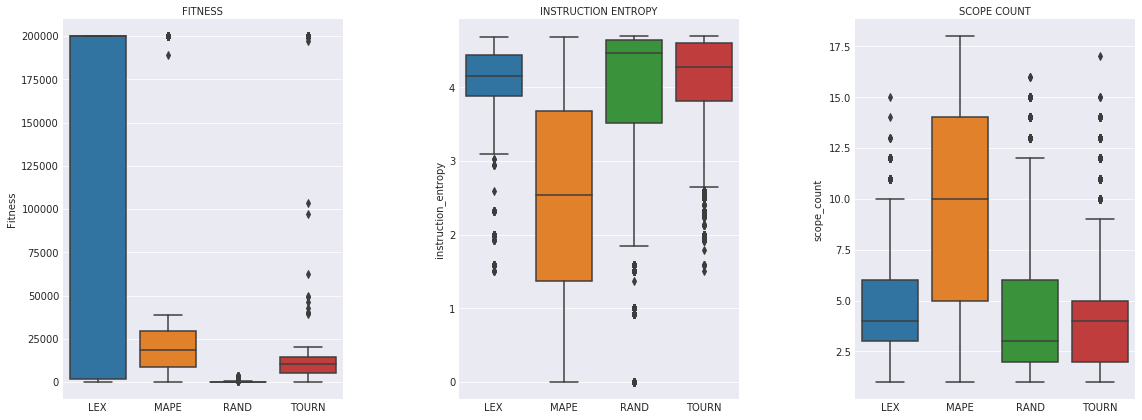

In [171]:
fig = plt.figure(1)
gridspec.GridSpec(1,16)
fig.set_size_inches(21, 7)

with sns.axes_style("darkgrid"):
    ax1 = plt.subplot2grid((1,12), (0,0), colspan=3)
    sns.boxplot(x="selection_method", y="fitness", data=scopegp_SUM, ax=ax1)
    ax1.set_xlabel("FITNESS")
    ax1.set_ylabel("Fitness")
    ax1.xaxis.set_label_position('top')

    ax2 = plt.subplot2grid((1,12), (0,4), colspan=3)
    p2 = sns.boxplot(x="selection_method", y="instruction_entropy", data=scopegp_SUM, ax=ax2)
    ax2.set_xlabel("INSTRUCTION ENTROPY")
    ax2.xaxis.set_label_position('top')
    
    
    ax3 = plt.subplot2grid((1,12), (0,8), colspan=3)
    p3 = sns.boxplot(x="selection_method", y="scope_count", data=scopegp_SUM, ax=ax3)
    ax3.set_xlabel("SCOPE COUNT")
    ax3.xaxis.set_label_position('top')

### SUM Problem - Tournament 

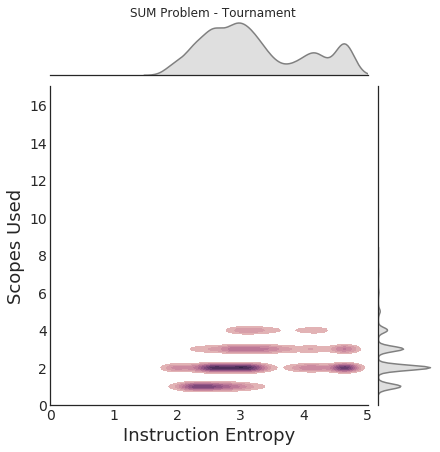

In [172]:
fig = plt.figure(1)
fig.set_size_inches(7,7)

with sns.axes_style("white"):

    g = sns.jointplot(data=scopegp_SUM_TOURN, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, color="Grey", shade_lowest=False)
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('SUM Problem - Tournament ', y=1.2, x=-3)

### SUM Problem - Map-Elites 

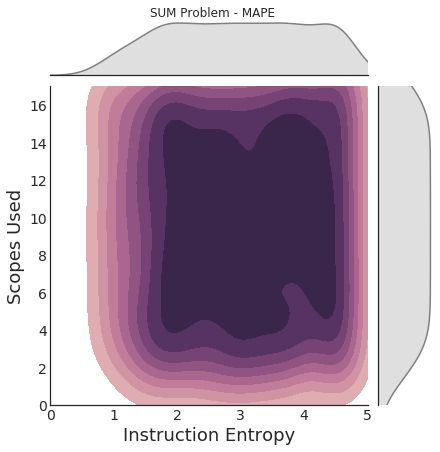

In [173]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_SUM_MAPE, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('SUM Problem - MAPE ', y=1.2, x=-3)

### SUM Problem - Lexicase 

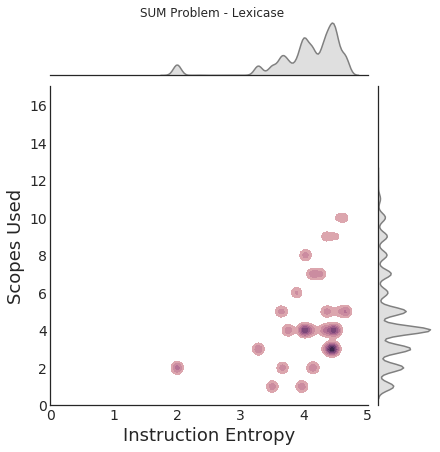

In [174]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_SUM_LEX, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('SUM Problem - Lexicase ', y=1.2, x=-3)

### SUM Problem - Random drift 

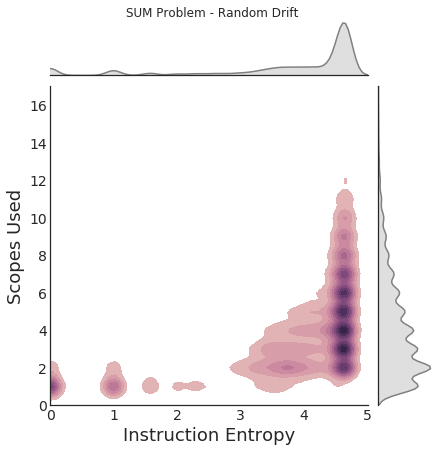

In [175]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_SUM_RAND, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('SUM Problem - Random Drift ', y=1.2, x=-3)

----

## COLLATZ PROBLEM

In [176]:
# COLLATZ problem
min_fitness = 175000 # You must have at least 10 fitness to not be filtered.
# - RANDOM (all), TOURNAMENT (FILTERED), MAPE (FILTERED), LEX (FILTERED)
scopegp_COLLATZ_RAND = scopegp_COLLATZ[scopegp_COLLATZ["selection_method"] == "RAND"]
scopegp_COLLATZ_TOURN = scopegp_COLLATZ[scopegp_COLLATZ["selection_method"] == "TOURN"]
scopegp_COLLATZ_MAPE = scopegp_COLLATZ[scopegp_COLLATZ["selection_method"] == "MAPE"]
scopegp_COLLATZ_LEX = scopegp_COLLATZ[scopegp_COLLATZ["selection_method"] == "LEX"]

# Filter to only successful organisms
scopegp_COLLATZ_TOURN = scopegp_COLLATZ_TOURN[scopegp_COLLATZ_TOURN["fitness"]>= min_fitness]
scopegp_COLLATZ_MAPE = scopegp_COLLATZ_MAPE[scopegp_COLLATZ_MAPE["fitness"]  >= min_fitness]
scopegp_COLLATZ_LEX = scopegp_COLLATZ_LEX[scopegp_COLLATZ_LEX["fitness"] >= min_fitness]


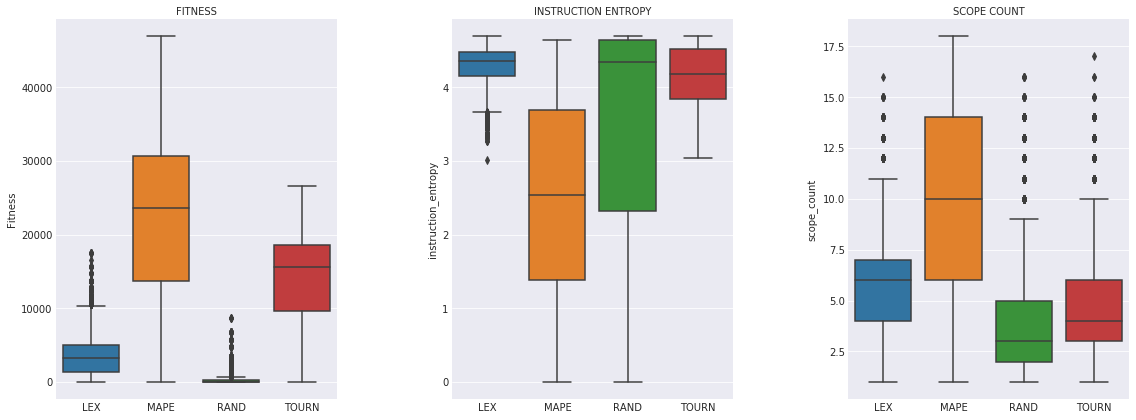

In [177]:
fig = plt.figure(1)
gridspec.GridSpec(1,16)
fig.set_size_inches(21, 7)

with sns.axes_style("darkgrid"):
    ax1 = plt.subplot2grid((1,12), (0,0), colspan=3)
    sns.boxplot(x="selection_method", y="fitness", data=scopegp_COLLATZ, ax=ax1)
    ax1.set_xlabel("FITNESS")
    ax1.set_ylabel("Fitness")
    ax1.xaxis.set_label_position('top')

    ax2 = plt.subplot2grid((1,12), (0,4), colspan=3)
    p2 = sns.boxplot(x="selection_method", y="instruction_entropy", data=scopegp_COLLATZ, ax=ax2)
    ax2.set_xlabel("INSTRUCTION ENTROPY")
    ax2.xaxis.set_label_position('top')
    
    
    ax3 = plt.subplot2grid((1,12), (0,8), colspan=3)
    p3 = sns.boxplot(x="selection_method", y="scope_count", data=scopegp_COLLATZ, ax=ax3)
    ax3.set_xlabel("SCOPE COUNT")
    ax3.xaxis.set_label_position('top')

### COLLATZ Problem - Tournament 

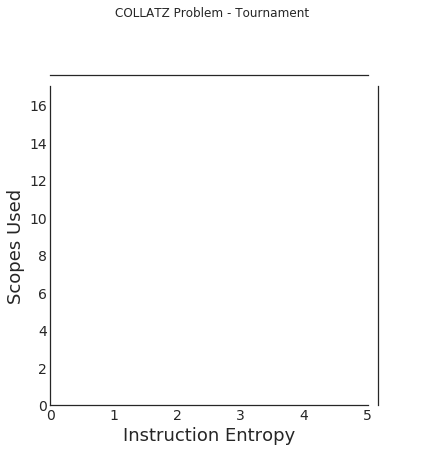

In [178]:
fig = plt.figure(1)
fig.set_size_inches(7,7)

with sns.axes_style("white"):

    g = sns.jointplot(data=scopegp_COLLATZ_TOURN, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, color="Grey", shade_lowest=False)
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('COLLATZ Problem - Tournament ', y=1.2, x=-3)

### COLLATZ Problem - Map-Elites 

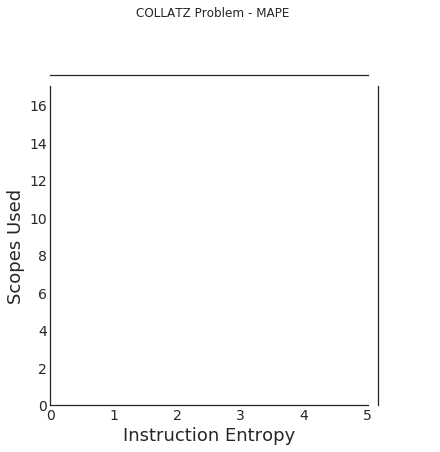

In [179]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_COLLATZ_MAPE, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('COLLATZ Problem - MAPE ', y=1.2, x=-3)

### COLLATZ Problem - Lexicase 

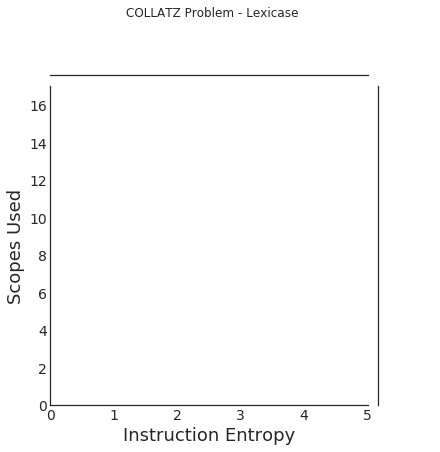

In [180]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_COLLATZ_LEX, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('COLLATZ Problem - Lexicase ', y=1.2, x=-3)

### COLLATZ Problem - Random drift 

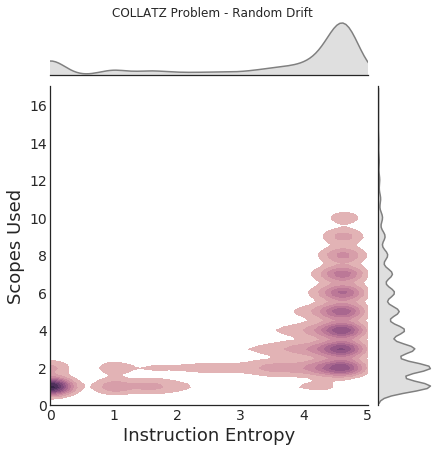

In [181]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_COLLATZ_RAND, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('COLLATZ Problem - Random Drift ', y=1.2, x=-3)

---

## SYMREG PROBLEM

In [182]:
# SYMREG problem
min_fitness = 200000 # You must have at least 10 fitness to not be filtered.
# - RANDOM (all), TOURNAMENT (FILTERED), MAPE (FILTERED), LEX (FILTERED)
scopegp_SYMREG_RAND = scopegp_SYMREG[scopegp_SYMREG["selection_method"] == "RAND"]
scopegp_SYMREG_TOURN = scopegp_SYMREG[scopegp_SYMREG["selection_method"] == "TOURN"]
scopegp_SYMREG_MAPE = scopegp_SYMREG[scopegp_SYMREG["selection_method"] == "MAPE"]
scopegp_SYMREG_LEX = scopegp_SYMREG[scopegp_SYMREG["selection_method"] == "LEX"]

# Filter to only successful organisms
scopegp_SYMREG_TOURN = scopegp_SYMREG_TOURN[scopegp_SYMREG_TOURN["fitness"]>= min_fitness]
scopegp_SYMREG_MAPE = scopegp_SYMREG_MAPE[scopegp_SYMREG_MAPE["fitness"]  >= min_fitness]
scopegp_SYMREG_LEX = scopegp_SYMREG_LEX[scopegp_SYMREG_LEX["fitness"] >= min_fitness]


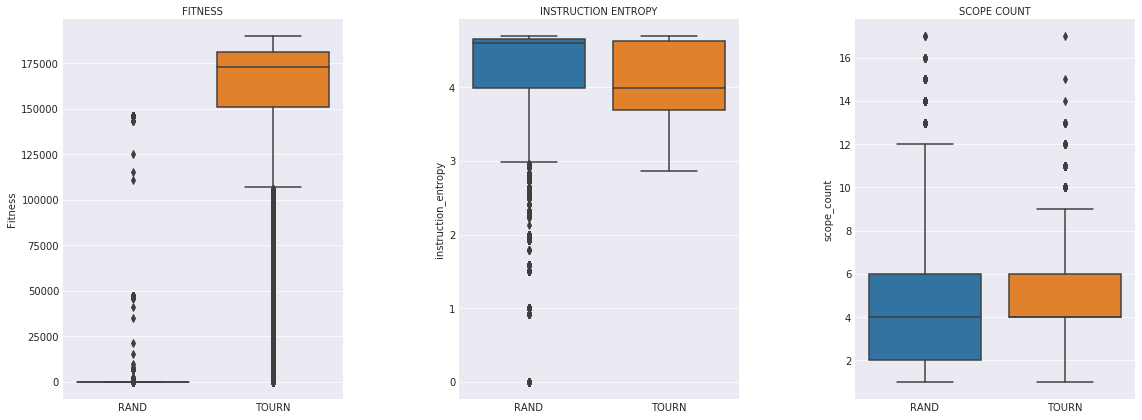

In [183]:
fig = plt.figure(1)
gridspec.GridSpec(1,16)
fig.set_size_inches(21, 7)

with sns.axes_style("darkgrid"):
    ax1 = plt.subplot2grid((1,12), (0,0), colspan=3)
    sns.boxplot(x="selection_method", y="fitness", data=scopegp_SYMREG, ax=ax1)
    ax1.set_xlabel("FITNESS")
    ax1.set_ylabel("Fitness")
    ax1.xaxis.set_label_position('top')

    ax2 = plt.subplot2grid((1,12), (0,4), colspan=3)
    p2 = sns.boxplot(x="selection_method", y="instruction_entropy", data=scopegp_SYMREG, ax=ax2)
    ax2.set_xlabel("INSTRUCTION ENTROPY")
    ax2.xaxis.set_label_position('top')
    
    
    ax3 = plt.subplot2grid((1,12), (0,8), colspan=3)
    p3 = sns.boxplot(x="selection_method", y="scope_count", data=scopegp_SYMREG, ax=ax3)
    ax3.set_xlabel("SCOPE COUNT")
    ax3.xaxis.set_label_position('top')

### SYMREG Problem - Tournament 

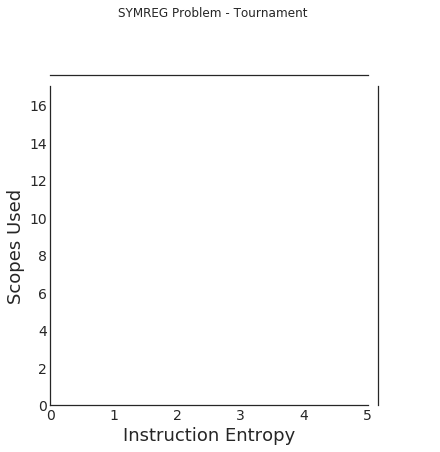

In [184]:
fig = plt.figure(1)
fig.set_size_inches(7,7)

with sns.axes_style("white"):

    g = sns.jointplot(data=scopegp_SYMREG_TOURN, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, color="Grey", shade_lowest=False)
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('SYMREG Problem - Tournament ', y=1.2, x=-3)

### SYMREG Problem - Map-Elites 

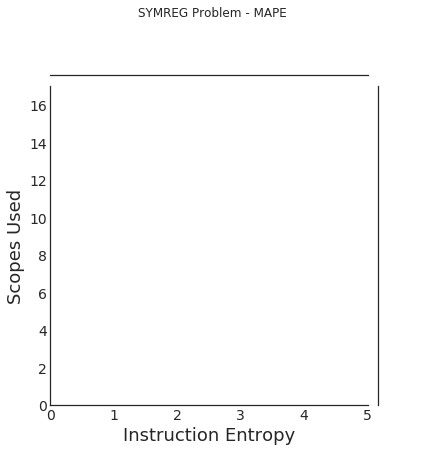

In [185]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_SYMREG_MAPE, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('SYMREG Problem - MAPE ', y=1.2, x=-3)

### SYMREG Problem - Lexicase 

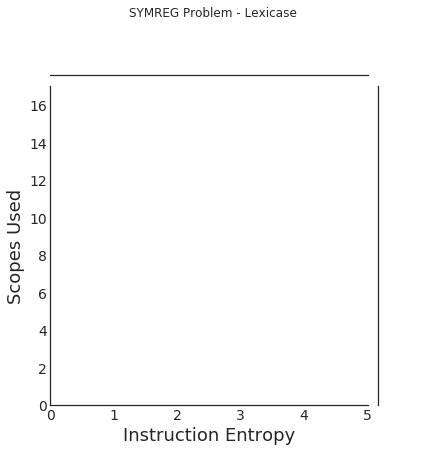

In [186]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_SYMREG_LEX, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('SYMREG Problem - Lexicase ', y=1.2, x=-3)

### SYMREG Problem - Random drift 

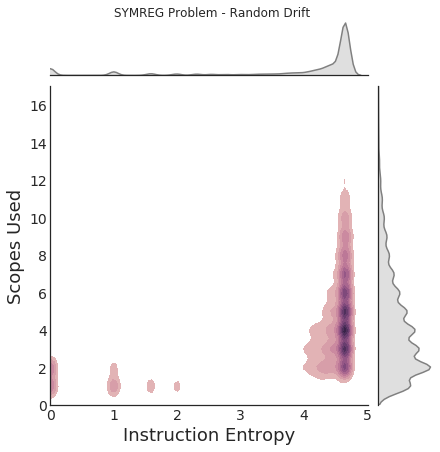

In [187]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=scopegp_SYMREG_RAND, x="instruction_entropy", y="scope_count", kind="kde",
                      xlim=(scope_min_inst_ent, scope_max_inst_ent), ylim=(min_scope_cnt, max_scope_cnt),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Instruction Entropy", "Scopes Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
    plt.title('SYMREG Problem - Random Drift ', y=1.2, x=-3)